In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data=pd.read_csv("../output_data/clean_data_for_analysis.csv")

In [3]:
data

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [4]:
features=data[['Release', 'Runtime', 'Genre', 'Budget', 'Platform']]
features

,Release,Runtime,Genre,Budget,Platform
0,2018-01-05,6180.0,Horror,10000000.0,others
1,2018-01-05,5700.0,Action,NaN,others
2,2018-04-06,6780.0,Adventure,NaN,others
3,2018-01-12,6240.0,Action,30000000.0,others
4,2018-01-12,5460.0,Comedy,NaN,others
...,...,...,...,...,...
1148,2022-12-16,11520.0,Action,350000000.0,others
1149,2022-12-21,6120.0,Animation,90000000.0,others
1150,2022-12-30,6360.0,Documentary,NaN,others
1151,2022-12-23,11340.0,Comedy,78000000.0,others


In [5]:
convert_to_unix = lambda x: int(datetime.strptime(x, '%Y-%m-%d').timestamp())

features['Release']=features['Release'].apply(convert_to_unix)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_3720/2456918480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Release']=features['Release'].apply(convert_to_unix)


In [6]:
# Create a OneHotEncoder for Genre
encoder = OneHotEncoder()
genre=features['Genre']
one_hot = encoder.fit_transform(features[['Genre']])
one_hot_df = pd.DataFrame(one_hot.toarray())
df_genre=pd.concat([genre, one_hot_df], axis=1)

df_genre['Genre']=genre
df_genre=df_genre.drop(columns='Genre')
df_genre.columns=encoder.categories_

In [7]:
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()
platform=features['Platform']
one_hot = encoder.fit_transform(features[['Platform']])
one_hot_df = pd.DataFrame(one_hot.toarray())
df_platform = pd.concat([platform, one_hot_df], axis=1)

df_platform['Platform']=platform
df_platform=df_platform.drop(columns='Platform')
df_platform.columns=encoder.categories_

In [9]:
df_platform

,amazon,disney,hulu,netflix,others
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1148,0.0,0.0,0.0,0.0,1.0
1149,0.0,0.0,0.0,0.0,1.0
1150,0.0,0.0,0.0,0.0,1.0
1151,0.0,0.0,0.0,0.0,1.0


# Drop the NaN from original data and merge the data together

In [10]:
colum_names_1=[i[0] for i in df_genre.columns]#Because names are tuples from encoder object
# column_names_2=[i[0] for i in df_platform.columns]
df_genre.columns=colum_names_1
# df_platform.columns=column_names_2


no_nan_features=features.dropna(how='any')
no_nan_features_genre=no_nan_features.drop(columns='Genre')
no_nan_features=pd.concat([no_nan_features_genre, df_genre], join='inner', axis=1)

In [11]:
no_nan_features

,Release,Runtime,Budget,Platform,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
0,1515139200,6180.0,10000000.0,others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1515744000,6240.0,30000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1516348800,7800.0,35000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1516348800,8400.0,30000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1516348800,6480.0,3500000.0,others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1148,1671177600,11520.0,350000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,1671609600,6120.0,90000000.0,others,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,1671782400,11340.0,78000000.0,others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
labels=data['Metascore']
labels

0       49.0
1       26.0
2       88.0
3       56.0
4       54.0
        ... 
1148    67.0
1149    73.0
1150    71.0
1151    60.0
1152    51.0
Name: Metascore, Length: 1153, dtype: float64

In [13]:
first_set=pd.concat([no_nan_features, labels], join='inner', axis=1)
first_set=first_set.drop(columns='Platform')
first_set=first_set.dropna()

first_set

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller,Metascore
0,1515139200,6180.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,1515744000,6240.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
7,1516348800,7800.0,35000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
8,1516348800,8400.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
9,1516348800,6480.0,3500000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
1148,1671177600,11520.0,350000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
1149,1671609600,6120.0,90000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0
1151,1671782400,11340.0,78000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [14]:
first_set.shape

(485, 20)

In [15]:
X_train, X_test, y_train, y_test=train_test_split(first_set.iloc[:,:19], first_set.iloc[:,19], train_size=.70)

In [16]:
X_train

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
968,1650610800,6000.0,70000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,1549612800,7020.0,20000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,1656054000,6180.0,18000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1054,1663311600,6000.0,7000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,1531465200,5820.0,80000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,1625209200,8280.0,200000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,1558681200,6120.0,6000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901,1640160000,6600.0,85000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,1637308800,7440.0,75000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# making predictions
predictions = model.predict(X_test)

In [19]:
predictions

array([53.64035201, 60.5282287 , 62.21057269, 50.03769628, 51.37373716,
       55.06375524, 52.74382918, 69.13868709, 56.46132415, 53.53131785,
       50.15936387, 54.20116725, 58.56438396, 53.51403922, 53.44033725,
       54.88979426, 46.32856279, 53.01110206, 46.90983292, 46.33554866,
       56.54387687, 70.66503048, 55.53392131, 53.80988102, 51.49368093,
       57.47464076, 67.41573421, 57.4498    , 58.53035037, 49.11181436,
       51.32097996, 52.57915717, 54.90629781, 55.43687794, 60.7681586 ,
       60.26755255, 61.90076137, 53.83281305, 61.40123863, 59.92268524,
       49.65722659, 48.95853727, 54.00397892, 57.68375453, 60.4601529 ,
       59.96483009, 59.91910876, 58.30637965, 66.12399387, 47.91751867,
       45.23379969, 60.23389191, 53.92082077, 63.16008242, 50.78309657,
       52.70971076, 51.06277235, 50.27638643, 65.54417064, 45.48700687,
       72.08629605, 53.2782458 , 55.07981528, 70.31088212, 57.16541382,
       51.47224686, 60.59993807, 16.85011514, 60.50243264, 63.35

In [20]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  203.02104264669558
mean_absolute_error :  11.721813503317309


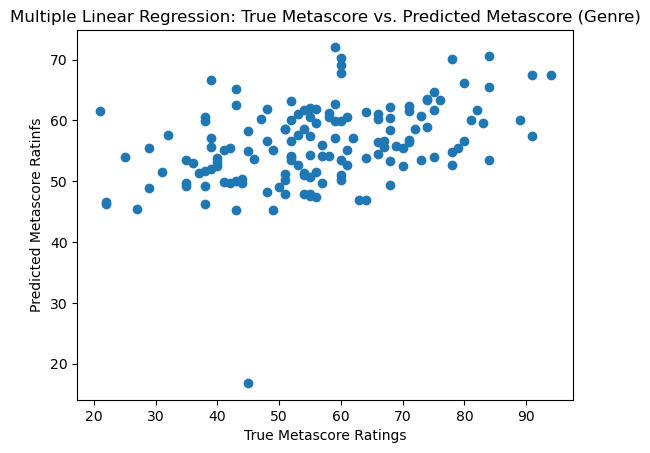

In [26]:
plt.scatter(y_test, predictions)
plt.xlabel("True Metascore Ratings")
plt.ylabel("Predicted Metascore Ratinfs")
plt.title("Multiple Linear Regression: True Metascore vs. Predicted Metascore (Genre)")

plt.savefig("MLR True vs Predicted (Genre)")

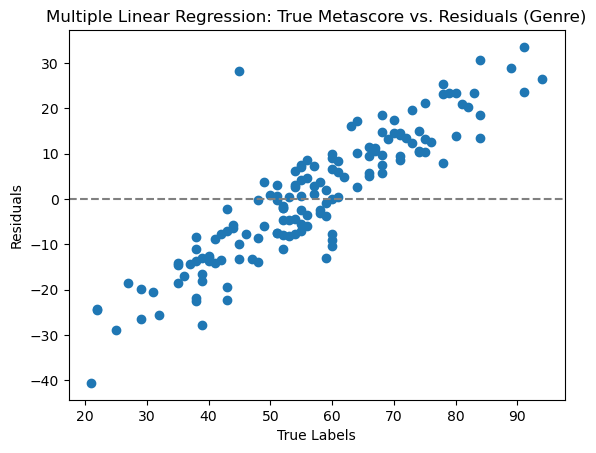

In [27]:
residuals = y_test - predictions

plt.scatter(y_test, residuals)
plt.xlabel("True Labels")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.title("Multiple Linear Regression: True Metascore vs. Residuals (Genre)")

plt.savefig("MLR True vs Residuals (Genre)")

# Same Analysis with Platform Variables

In [28]:
# colum_names_1=[i[0] for i in df_genre.columns]#Because names are tuples from encoder object
# df_genre.columns=colum_names_1



no_nan_features=features.dropna(how='any')
no_nan_features_platform=no_nan_features.drop(columns='Platform')
no_nan_features=pd.concat([no_nan_features_platform, df_platform], join='inner', axis=1)

column_names_2=[i[0] for i in df_platform.columns]
df_platform.columns=column_names_2


no_nan_features=features.dropna(how='any')
no_nan_features_platform=no_nan_features.drop(columns='Platform')
no_nan_features=pd.concat([no_nan_features_platform, df_platform], join='inner', axis=1)

In [29]:
second_set=pd.concat([no_nan_features, labels], join='inner', axis=1)
second_set=second_set.drop(columns='Genre')
second_set=second_set.dropna()

second_set

,Release,Runtime,Budget,amazon,disney,hulu,netflix,others,Metascore
0,1515139200,6180.0,10000000.0,0.0,0.0,0.0,0.0,1.0,49.0
3,1515744000,6240.0,30000000.0,0.0,0.0,0.0,0.0,1.0,56.0
7,1516348800,7800.0,35000000.0,0.0,0.0,0.0,0.0,1.0,54.0
8,1516348800,8400.0,30000000.0,0.0,0.0,0.0,0.0,1.0,49.0
9,1516348800,6480.0,3500000.0,0.0,0.0,0.0,0.0,1.0,36.0
...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,0.0,0.0,0.0,0.0,1.0,60.0
1148,1671177600,11520.0,350000000.0,0.0,0.0,0.0,0.0,1.0,67.0
1149,1671609600,6120.0,90000000.0,0.0,0.0,0.0,0.0,1.0,73.0
1151,1671782400,11340.0,78000000.0,0.0,0.0,0.0,0.0,1.0,60.0


In [30]:
X_train, X_test, y_train, y_test=train_test_split(second_set.iloc[:,:8], second_set.iloc[:,8], train_size=.70)


model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

array([54.6446537 , 55.85359815, 55.8315318 , 54.15104697, 61.21051885,
       63.67329681, 66.58020745, 61.11305411, 57.54767981, 65.54863514,
       59.87680159, 61.35581587, 53.81669674, 57.17387838, 58.31023102,
       51.67478221, 63.93732948, 60.33266268, 51.31748156, 53.58427244,
       57.78704301, 52.53520936, 56.84592329, 58.61695583, 35.65246572,
       64.99434519, 51.66184524, 50.81007953, 63.94127255, 40.14106275,
       55.76823219, 37.46567677, 59.64220757, 56.7510837 , 54.34724054,
       51.08992905, 56.46531107, 54.30595988, 51.93192564, 51.55957491,
       62.29097706, 60.49325449, 52.58181664, 55.76016458, 55.83998521,
       59.45265653, 60.92532548, 56.68515166, 51.00344926, 57.31622853,
       55.40142982, 53.40129425, 63.47402004, 55.79595519, 56.31909691,
       51.59763884, 55.40172346, 59.06326019, 56.23382454, 51.00679563,
       54.30942976, 57.03722629, 58.61200265, 53.55578148, 56.4455064 ,
       33.73563246, 56.95704236, 60.98701915, 55.04586395, 55.83

In [31]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  237.89956112770795
mean_absolute_error :  12.638925026388538


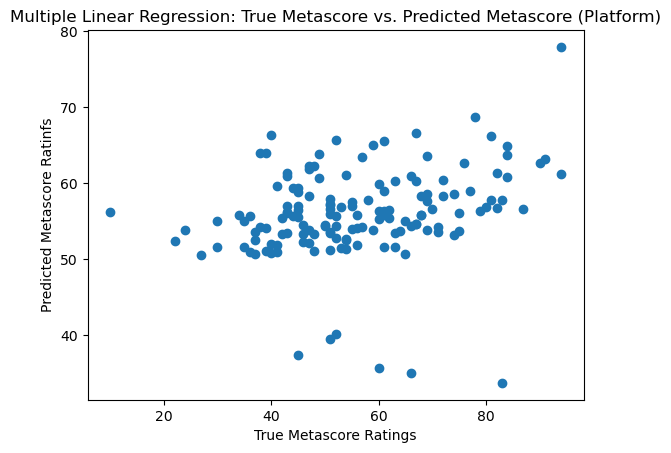

In [32]:
plt.scatter(y_test, predictions)
plt.xlabel("True Metascore Ratings")
plt.ylabel("Predicted Metascore Ratinfs")
plt.title("Multiple Linear Regression: True Metascore vs. Predicted Metascore (Platform)")

plt.savefig("MLR True vs Predicted (Platform)")

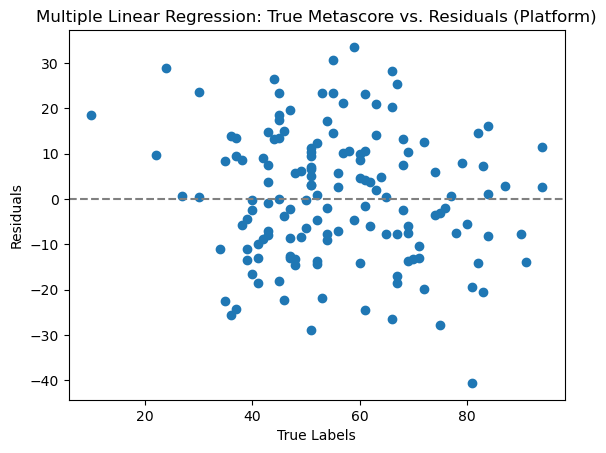

In [33]:
plt.scatter(y_test, residuals)
plt.xlabel("True Labels")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.title("Multiple Linear Regression: True Metascore vs. Residuals (Platform)")

plt.savefig("MLR True vs Residuals (Platform)")

# MLPRegressor for Metascore

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [35]:
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
no_nan_features=features.dropna(how='any')
no_nan_features_genre=no_nan_features.drop(columns='Genre')
no_nan_features=pd.concat([no_nan_features_genre, df_genre], join='inner', axis=1)


colum_names_1=[i[0] for i in df_genre.columns]#Because names are tuples from encoder object
# column_names_2=[i[0] for i in df_platform.columns]
df_genre.columns=colum_names_1
# df_platform.columns=column_names_2


first_set=pd.concat([no_nan_features, labels], join='inner', axis=1)
first_set=first_set.drop(columns='Platform')
first_set=first_set.dropna()

first_set

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller,Metascore
0,1515139200,6180.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,1515744000,6240.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
7,1516348800,7800.0,35000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
8,1516348800,8400.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
9,1516348800,6480.0,3500000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
1148,1671177600,11520.0,350000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
1149,1671609600,6120.0,90000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0
1151,1671782400,11340.0,78000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [37]:
labels=first_set['Metascore']
first_set=first_set.drop(columns='Metascore')
one_hots=first_set.iloc[:,3:19]
scaled=first_set.drop(columns=['Release', 'Runtime', 'Budget'])

scaled=preprocessing.StandardScaler().fit_transform(first_set.iloc[:,:3])

scaled

array([[-1.48852401, -0.65499763, -0.74911307],
       [-1.47602093, -0.60228918, -0.42641985],
       [-1.46351784,  0.76813062, -0.34574655],
       ...,
       [ 1.74620365, -0.70770609,  0.54165979],
       [ 1.74977596,  3.8779294 ,  0.34804386],
       [ 1.74977596,  1.50604898, -0.18439994]])

In [38]:
features=np.concatenate((scaled, one_hots), axis=1)

In [39]:
labels

0       49.0
3       56.0
7       54.0
8       49.0
9       36.0
        ... 
1144    60.0
1148    67.0
1149    73.0
1151    60.0
1152    51.0
Name: Metascore, Length: 485, dtype: float64

In [40]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, train_size=.70)

model = MLPRegressor(max_iter=1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([61.28369663, 58.74767096, 66.5213482 , 47.32843363, 62.11930462,
       54.3572729 , 50.32921158, 52.71096017, 47.88967115, 60.08247035,
       62.16883638, 72.44878569, 59.49579324, 53.16843669, 54.5000252 ,
       49.63604528, 54.84031145, 76.39155376, 68.74483516, 61.66395479,
       51.69233704, 60.15756779, 56.35336554, 73.4931073 , 56.82183051,
       57.17929512, 58.51135094, 57.18483751, 50.3170873 , 30.49231072,
       54.80052854, 54.38835159, 63.68938766, 54.80454516, 62.55422572,
       42.99212689, 43.23373573, 58.39703107, 63.60089221, 74.66258376,
       57.17256649, 51.015784  , 60.39568169, 51.18406885, 55.90954383,
       69.45595977, 53.37541152, 68.61447622, 56.11563321, 55.72086059,
       49.0053132 , 58.31006262, 60.67744413, 63.89448242, 75.09892097,
       59.41761734, 55.43120006, 61.13819633, 51.47734789, 60.06170714,
       61.25330362, 52.25996807, 66.46573178, 59.63716991, 52.66005558,
       54.40969118, 46.15444972, 48.142961  , 57.09191677, 51.59

In [41]:
mse = mean_squared_error(y_test, predictions)

In [42]:
mse

237.3077661373542

# MLPClassifier to Predict Genre based on Gross, Runtime, Metascore

In [57]:
data

#Selecting Features and Labels
subset=data[['Gross', 'Runtime', 'Metascore', 'Genre']]
subset=subset.dropna()

labels=subset['Genre']
features=subset.loc[:,:'Metascore']
features=preprocessing.StandardScaler().fit_transform(features)


labels=labels.to_numpy().reshape(-1,1)
labels=preprocessing.OneHotEncoder().fit_transform(labels)
labels=labels.toarray()

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [61]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, train_size=.70)

model = MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
model.score(X_test, y_test)

0.09829059829059829

In [67]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

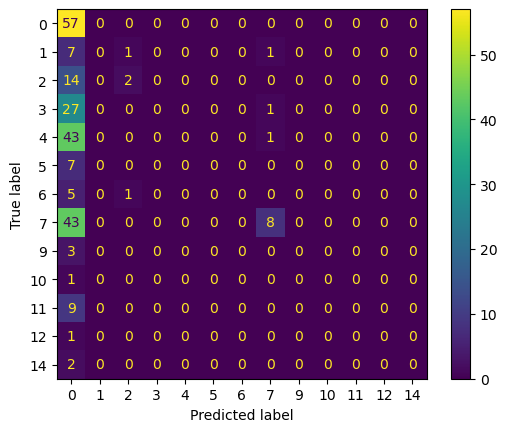

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), predictions.argmax(axis=1))


plt.savefig("Confusion Matrix")

# Its a terrrrrible

# A quick stats test on the mean gross before and after COVID across all movies for validation of data analysis

In [73]:
pre_covid=data.iloc[:450]
post_covid=data.iloc[450:]

In [74]:
post_covid=post_covid.reset_index(drop=True)

In [75]:
test=post_covid['Gross'].dropna(0).to_numpy()

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19125/1461022591.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  test=post_covid['Gross'].dropna(0).to_numpy()


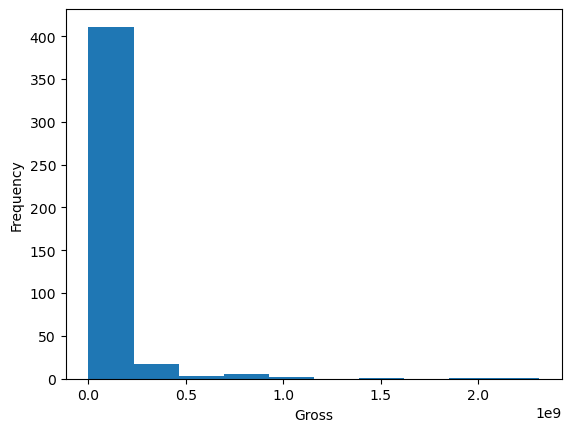

<Figure size 640x480 with 0 Axes>

In [83]:
plt.hist(test, bins=10)
plt.xlabel('Gross')
plt.ylabel('Frequency')

plt.savefig("Gross Histogram Post-Covid")

In [77]:
# Calculate mean, median, skewness, and kurtosis
mean = np.mean(test)
median = np.median(test)
skewness = stats.skew(test)
kurtosis = stats.kurtosis(test)

# Print results
print("Mean:", mean)
print("Median:", median)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 63095924.12244898
Median: 2217874.0
Skewness: 6.649098928561425
Kurtosis: 55.98974620118023


In [78]:
# Perform Shapiro-Wilk test...this test shows that the data is not normally distributed as supported by histograms
statistic, p_value = stats.shapiro(test)
print("Shapiro-Wilk test statistic:", statistic)
print("Shapiro-Wilk test p-value:", p_value)


Shapiro-Wilk test statistic: 0.3265306353569031
Shapiro-Wilk test p-value: 3.2776427132496044e-37


In [81]:
test_pre=pre_covid['Gross'].dropna(0).to_numpy()

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19125/1055301663.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  test_pre=pre_covid['Gross'].dropna(0).to_numpy()


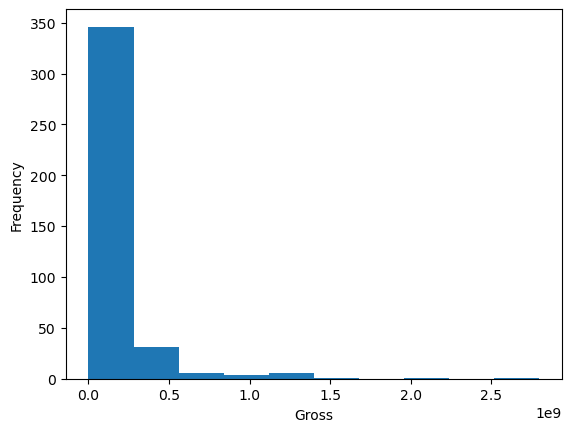

<Figure size 640x480 with 0 Axes>

In [84]:
plt.hist(test_pre, bins=10)
plt.xlabel('Gross')
plt.ylabel('Frequency')

plt.savefig("Gross Histogram Pre Covid")

In [22]:
# Calculate mean, median, skewness, and kurtosis
mean = np.mean(test_pre)
median = np.median(test_pre)
skewness = stats.skew(test_pre)
kurtosis = stats.kurtosis(test_pre)

# Print results
print("Mean:", mean)
print("Median:", median)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 125293588.52777778
Median: 22960699.0
Skewness: 4.733739510833031
Kurtosis: 30.288230064163983


In [25]:
# Perform Mann-Whitney U test because of lack of normality
u_stat, p_value = stats.mannwhitneyu(test, test_pre)

# Print results
print("U statistic:", u_stat)
print("p-value:", p_value)

U statistic: 58422.0
p-value: 1.2919847698469968e-16
